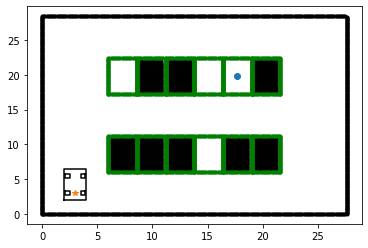

start :  [3, 3, 1.5707963267948966]
target :  [17.7, 19.8, -1.5707963267948966]


In [4]:
from tracemalloc import start
import numpy as np
import math
import Vehicle
import Environment as Env
import matplotlib.pyplot as plt
import random
import Global_path_planning as GPL

CAR_INIT_X = 3
CAR_INIT_Y = 3
CAR_INIT_YAW = 90 #deg

env = Env.Environment_1(Env.XMIN,Env.YMIN,Env.XMAX,Env.YMAX)
env.create_world_1()
env.plot_world()
veh = Vehicle.Vehicle(x = CAR_INIT_X, y =CAR_INIT_Y, yaw=np.deg2rad(90), v=0.0)
veh.plot_car(0)
plt.show()

obs_list = env.obstacle_list

start_pos = [veh.x, veh.y, veh.yaw]
target_pos = [env.target_x, env.target_y, np.deg2rad(-90.0)]

print("start : ", start_pos)
print("target : ", target_pos)

In [5]:
a = GPL.Global_Hybrid_A_Star_Planning(start_pos, target_pos, obs_list)

In [6]:
from scipy.spatial import cKDTree
a = np.vstack(([1, 2, 3],[4, 5, 6])).T
b = np.array([[1,4],[2,5],[3,6]])
KT = cKDTree(b)
KT.query_ball_point([1, 2], 5)

[0, 1, 2]

In [7]:
# Vehicle parameters
LENGTH = 4.5  # [m]
WIDTH = 2.0  # [m]
BACKTOWHEEL = 1.0  # [m]
WHEEL_LEN = 0.3  # [m]
WHEEL_WIDTH = 0.2  # [m]
TREAD = 0.7  # [m]
WB = 2.5  # [m]

MAX_STEER = np.deg2rad(45.0)  # maximum steering angle [rad]
MAX_DSTEER = np.deg2rad(30.0)  # maximum steering speed [rad/s]
MAX_SPEED = 55.0 / 3.6  # maximum speed [m/s]
MIN_SPEED = -20.0 / 3.6  # minimum speed [m/s]
MAX_ACCEL = 1.0  # maximum accel [m/ss]

DT = 0.1

LF = LENGTH - BACKTOWHEEL
LB = BACKTOWHEEL
VEHICLE_RAD = np.hypot((LF + LB) / 2.0, WIDTH / 2.0)
VEHICLE_RAD

2.462214450449026

In [ ]:
start_node = GPL.Global_Node(start_pos[0], start_pos[1], start_pos[2], True,
                             [start_pos[0]], [start_pos[1]], [start_pos[2]], [True], cost = 0)

target_node = GPL.Global_Node(target_pos[0], target_pos[1], target_pos[2], True,
                             [target_pos[0]], [target_pos[1]], [target_pos[2]], [True])

open_set, closed_set = dict(), dict()